In [2]:
import os
import struct
import numpy as np

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [10]:
train_data = list(read(dataset='training',path='.'))

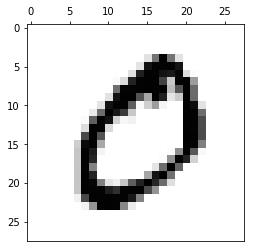

In [42]:
label, pixel = train_data[1]
show(pixel)

In [48]:
all_pixel = pixel.flatten()
all_label = np.matrix(label)
for i in range(1,10000):
    lable,pixel = train_data[i]
    new_pixel = pixel.flatten()
    all_label = np.vstack((all_label, label))
    all_pixel = np.vstack((all_pixel, new_pixel))


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
print all_pixel.shape
print all_label.shape

(10000L, 784L)
(10000L, 1L)


In [66]:
#Mean for each feature
mean = np.mean(all_pixel.T[0,:])
all_mean = np.matrix(mean)
for i in range(1,784):
    mean = np.mean(all_pixel.T[i,:])
    all_mean = np.vstack((all_mean, mean))
all_mean.shape

(784L, 1L)

In [75]:
# Compute covariance Matrix
cov_mat = np.cov(all_pixel.T)

In [76]:
type(cov_mat)
cov_mat.shape

(784L, 784L)

In [87]:
#Compute Eigen_Value & Eigen_vector
eig_val, eig_vec = np.linalg.eig(cov_mat)

 <pre>
 1. Please download the data set and extract it to current directory
 2. Run the above cells you get the data in readable formate and pixel formate (60000 * 28 * 28), you can do operations on train_data
 3. Implement the PCA algorithm on the train_data.
     i.   You can do the pricipal component analysis on smaller data &lt; 60000 (not less than 10k points) data points
     ii.  Plot the eigen values and eigen vectors
     iii. Find the varaince explained based on the eigen values we got in step (ii)
     iii. Select top two eigen values, corresponding eigen vectors and project the data points on those vectors
     iv.  Plot the resultent lower dimension points with hue="data_labels"
 4. Use the sklearn libraries pca function
     i.   Find out the amount of variance explained by each component, select the top components based on this result
     ii.  Transform the data into lower dimensional data
     iii. Plot the resultent lower dimension points with hue="data_labels"
 5. Compare the result of both step 3 and step 4
</pre>